In [1]:
import pandas as pd

In [2]:
Food_Delivery =pd.read_csv("food_orders_new_delhi.csv")

In [3]:
Food_Delivery

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,01-02-2024 01:11,01-02-2024 02:39,1914,0,Credit Card,5% on App,150,47,0
1,2,C1860,R2054,02-02-2024 22:11,02-02-2024 22:46,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,31-01-2024 05:54,31-01-2024 06:52,937,30,Cash on Delivery,15% New User,195,45,0
3,4,C6191,R2642,16-01-2024 22:52,16-01-2024 23:38,1463,50,Cash on Delivery,None,146,27,0
4,5,C6734,R2799,29-01-2024 01:19,29-01-2024 02:48,1992,30,Cash on Delivery,50 off Promo,130,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,C6232,R2129,14-01-2024 05:57,14-01-2024 06:39,825,0,Digital Wallet,5% on App,165,47,50
996,997,C6797,R2742,28-01-2024 08:50,28-01-2024 10:10,1627,50,Cash on Delivery,None,110,42,0
997,998,C5926,R2837,21-01-2024 09:43,21-01-2024 10:44,553,20,Cash on Delivery,None,64,31,0
998,999,C7016,R2144,30-01-2024 22:23,31-01-2024 00:07,1414,0,Cash on Delivery,15% New User,199,34,0


In [4]:
print(Food_Delivery.head())

   Order ID Customer ID Restaurant ID Order Date and Time  \
0         1       C8270         R2924    01-02-2024 01:11   
1         2       C1860         R2054    02-02-2024 22:11   
2         3       C6390         R2870    31-01-2024 05:54   
3         4       C6191         R2642    16-01-2024 22:52   
4         5       C6734         R2799    29-01-2024 01:19   

  Delivery Date and Time  Order Value  Delivery Fee    Payment Method  \
0       01-02-2024 02:39         1914             0       Credit Card   
1       02-02-2024 22:46          986            40    Digital Wallet   
2       31-01-2024 06:52          937            30  Cash on Delivery   
3       16-01-2024 23:38         1463            50  Cash on Delivery   
4       29-01-2024 02:48         1992            30  Cash on Delivery   

  Discounts and Offers  Commission Fee  Payment Processing Fee  \
0            5% on App             150                      47   
1                  10%             198                      23

In [5]:
print(Food_Delivery.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Order ID                1000 non-null   int64 
 1   Customer ID             1000 non-null   object
 2   Restaurant ID           1000 non-null   object
 3   Order Date and Time     1000 non-null   object
 4   Delivery Date and Time  1000 non-null   object
 5   Order Value             1000 non-null   int64 
 6   Delivery Fee            1000 non-null   int64 
 7   Payment Method          1000 non-null   object
 8   Discounts and Offers    1000 non-null   object
 9   Commission Fee          1000 non-null   int64 
 10  Payment Processing Fee  1000 non-null   int64 
 11  Refunds/Chargebacks     1000 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 93.9+ KB
None


In [6]:
from datetime import datetime

In [7]:
# convert date and time columns to datetime
Food_Delivery['Order Date and Time'] = pd.to_datetime(Food_Delivery['Order Date and Time'])


In [8]:
Food_Delivery['Delivery Date and Time'] = pd.to_datetime(Food_Delivery['Delivery Date and Time'])

In [9]:
pd

<module 'pandas' from 'C:\\Users\\vanitha\\anaconda3\\lib\\site-packages\\pandas\\__init__.py'>

In [10]:
pd.to_datetime(Food_Delivery['Order Date and Time'])

0     2024-01-02 01:11:00
1     2024-02-02 22:11:00
2     2024-01-31 05:54:00
3     2024-01-16 22:52:00
4     2024-01-29 01:19:00
              ...        
995   2024-01-14 05:57:00
996   2024-01-28 08:50:00
997   2024-01-21 09:43:00
998   2024-01-30 22:23:00
999   2024-08-01 14:46:00
Name: Order Date and Time, Length: 1000, dtype: datetime64[ns]

In [11]:
pd.to_datetime(Food_Delivery['Delivery Date and Time'])

0     2024-01-02 02:39:00
1     2024-02-02 22:46:00
2     2024-01-31 06:52:00
3     2024-01-16 23:38:00
4     2024-01-29 02:48:00
              ...        
995   2024-01-14 06:39:00
996   2024-01-28 10:10:00
997   2024-01-21 10:44:00
998   2024-01-31 00:07:00
999   2024-08-01 15:39:00
Name: Delivery Date and Time, Length: 1000, dtype: datetime64[ns]

In [12]:
# first, let's create a function to extract numeric values from the 'Discounts and Offers' string
def extract_discount(discount_str):
    if 'off' in discount_str:
        # Fixed amount off
        return float(discount_str.split(' ')[0])
    elif '%' in discount_str:
        # Percentage off
        return float(discount_str.split('%')[0])
    else:
        # No discount
        return 0.0

In [13]:
# apply the function to create a new 'Discount Value' column
Food_Delivery['Discount Percentage'] = Food_Delivery['Discounts and Offers'].apply(lambda x: extract_discount(x))

In [14]:
Food_Delivery['Discount Percentage']

0       5.0
1      10.0
2      15.0
3       0.0
4      50.0
       ... 
995     5.0
996     0.0
997     0.0
998    15.0
999    15.0
Name: Discount Percentage, Length: 1000, dtype: float64

In [15]:
Food_Delivery['Discounts and Offers'].apply(lambda x: extract_discount(x))

0       5.0
1      10.0
2      15.0
3       0.0
4      50.0
       ... 
995     5.0
996     0.0
997     0.0
998    15.0
999    15.0
Name: Discounts and Offers, Length: 1000, dtype: float64

In [16]:
Food_Delivery['Discount Amount'] = Food_Delivery.apply(lambda x: (x['Order Value'] * x['Discount Percentage'] / 100)
                                                   if x['Discount Percentage'] > 1
                                                   else x['Discount Percentage'], axis=1)

In [17]:
Food_Delivery['Discount Amount']

0       95.70
1       98.60
2      140.55
3        0.00
4      996.00
        ...  
995     41.25
996      0.00
997      0.00
998    212.10
999    248.55
Name: Discount Amount, Length: 1000, dtype: float64

In [18]:
Food_Delivery['Discount Amount'] = Food_Delivery.apply(lambda x: x['Discount Amount'] if x['Discount Percentage'] <= 1
                                                   else x['Order Value'] * x['Discount Percentage'] / 100, axis=1)

In [19]:
Food_Delivery['Discount Amount'] 

0       95.70
1       98.60
2      140.55
3        0.00
4      996.00
        ...  
995     41.25
996      0.00
997      0.00
998    212.10
999    248.55
Name: Discount Amount, Length: 1000, dtype: float64

In [20]:
Food_Delivery.apply(lambda x: x['Discount Amount'] if x['Discount Percentage'] <= 1
                                                   else x['Order Value'] * x['Discount Percentage'] / 100, axis=1)

0       95.70
1       98.60
2      140.55
3        0.00
4      996.00
        ...  
995     41.25
996      0.00
997      0.00
998    212.10
999    248.55
Length: 1000, dtype: float64

In [21]:
print(Food_Delivery[['Order Value', 'Discounts and Offers', 'Discount Percentage', 'Discount Amount']].head(), Food_Delivery.dtypes)

   Order Value Discounts and Offers  Discount Percentage  Discount Amount
0         1914            5% on App                  5.0            95.70
1          986                  10%                 10.0            98.60
2          937         15% New User                 15.0           140.55
3         1463                 None                  0.0             0.00
4         1992         50 off Promo                 50.0           996.00 Order ID                           int64
Customer ID                       object
Restaurant ID                     object
Order Date and Time       datetime64[ns]
Delivery Date and Time    datetime64[ns]
Order Value                        int64
Delivery Fee                       int64
Payment Method                    object
Discounts and Offers              object
Commission Fee                     int64
Payment Processing Fee             int64
Refunds/Chargebacks                int64
Discount Percentage              float64
Discount Amount        

In [54]:
# calculate total costs and revenue per order


In [55]:
# aggregate data to get overall metrics


In [56]:
Food_Delivery['Revenue'] = Food_Delivery['Commission Fee']

In [57]:
Food_Delivery['Revenue']

0      150
1      198
2      195
3      146
4      130
      ... 
995    165
996    110
997     64
998    199
999    180
Name: Revenue, Length: 1000, dtype: int64

In [58]:
Food_Delivery['Profit'] = Food_Delivery['Revenue'] -Food_Delivery['Total Costs']

In [59]:
Food_Delivery['Profit']

0        7.30
1       36.40
2      -20.55
3       69.00
4     -946.00
        ...  
995     76.75
996     18.00
997     13.00
998    -47.10
999   -115.55
Name: Profit, Length: 1000, dtype: float64

In [60]:
total_orders = Food_Delivery.shape[0]

In [61]:
total_orders

1000

In [62]:
total_revenue = Food_Delivery['Revenue'].sum()

In [63]:
total_revenue

126990

In [64]:
total_costs = Food_Delivery['Total Costs'].sum()

In [65]:
total_costs

232709.85

In [66]:
total_profit = Food_Delivery['Profit'].sum()

In [67]:
total_profit

-105719.85

In [68]:
overall_metrics = {
    "Total Orders": total_orders,
    "Total Revenue": total_revenue,
    "Total Costs": total_costs,
    "Total Profit": total_profit
}

In [69]:
print(overall_metrics)

{'Total Orders': 1000, 'Total Revenue': 126990, 'Total Costs': 232709.85, 'Total Profit': -105719.85}


In [70]:
import matplotlib.pyplot as plt



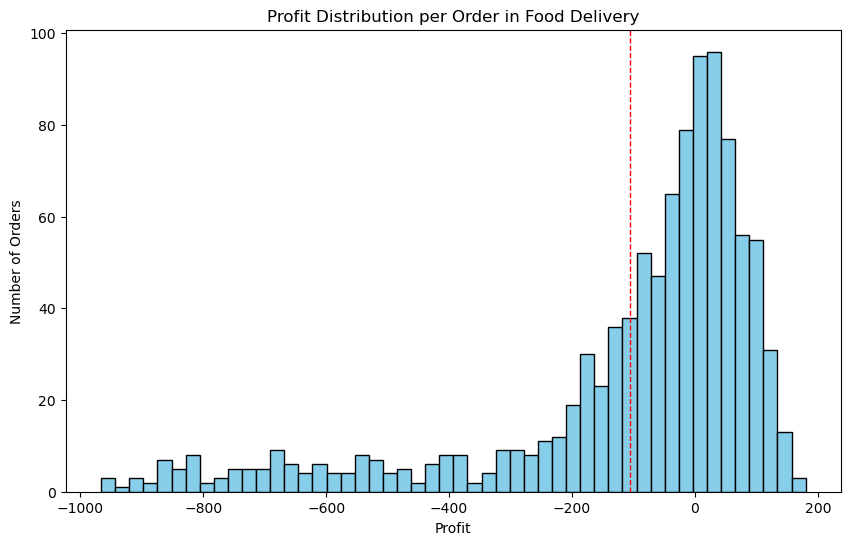

In [71]:
# histogram of profits per order
plt.figure(figsize=(10, 6))
plt.hist(Food_Delivery['Profit'], bins=50, color='skyblue', edgecolor='black')
plt.title('Profit Distribution per Order in Food Delivery')
plt.xlabel('Profit')
plt.ylabel('Number of Orders')
plt.axvline(Food_Delivery['Profit'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.show()

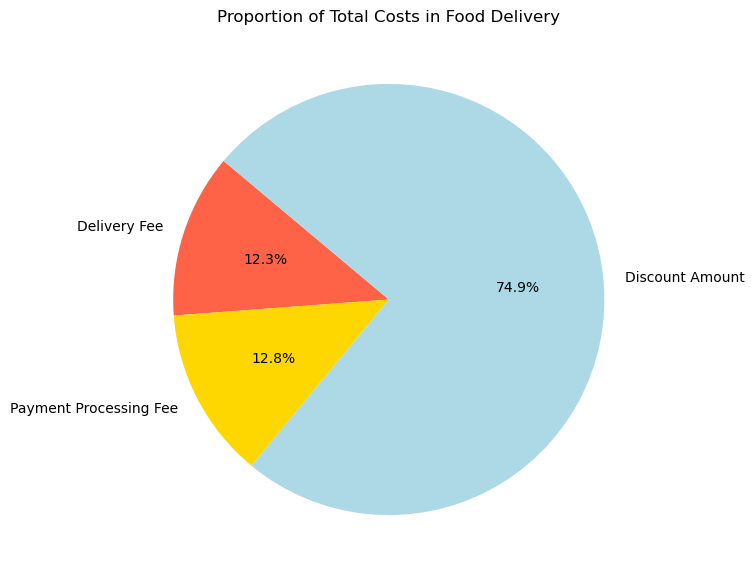

In [72]:
# pie chart for the proportion of total costs
costs_breakdown = Food_Delivery[['Delivery Fee', 'Payment Processing Fee', 'Discount Amount']].sum()
plt.figure(figsize=(7, 7))
plt.pie(costs_breakdown, labels=costs_breakdown.index, autopct='%1.1f%%', startangle=140, colors=['tomato', 'gold', 'lightblue'])
plt.title('Proportion of Total Costs in Food Delivery')
plt.show()

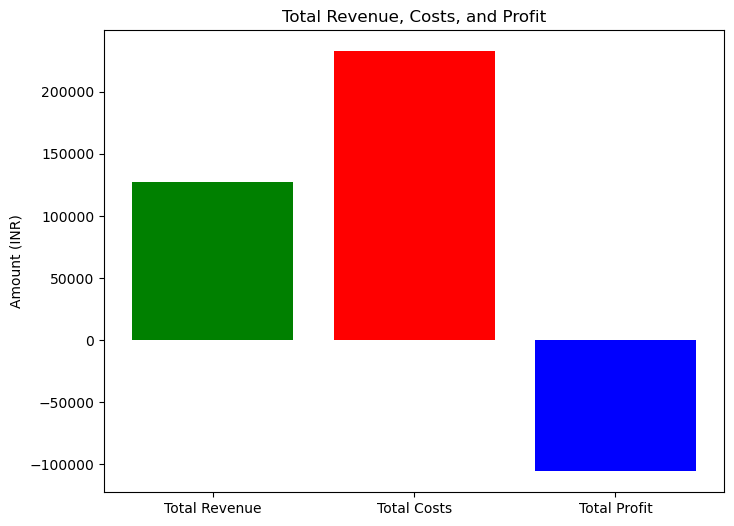

In [73]:
# bar chart for total revenue, costs, and profit
totals = ['Total Revenue', 'Total Costs', 'Total Profit']
values = [total_revenue, total_costs, total_profit]

plt.figure(figsize=(8, 6))
plt.bar(totals, values, color=['green', 'red', 'blue'])
plt.title('Total Revenue, Costs, and Profit')
plt.ylabel('Amount (INR)')
plt.show()

In [76]:
# filter the dataset for profitable orders
profitable_orders = Food_Delivery[Food_Delivery['Profit'] > 0]

In [77]:
profitable_orders

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Discount Percentage,Discount Amount,Total Costs,Revenue,Profit
0,1,C8270,R2924,2024-01-02 01:11:00,2024-01-02 02:39:00,1914,0,Credit Card,5% on App,150,47,0,5.0,95.70,142.70,150,7.30
1,2,C1860,R2054,2024-02-02 22:11:00,2024-02-02 22:46:00,986,40,Digital Wallet,10%,198,23,0,10.0,98.60,161.60,198,36.40
3,4,C6191,R2642,2024-01-16 22:52:00,2024-01-16 23:38:00,1463,50,Cash on Delivery,None,146,27,0,0.0,0.00,77.00,146,69.00
5,6,C7265,R2777,2024-01-25 04:36:00,2024-01-25 05:27:00,439,20,Cash on Delivery,10%,92,27,150,10.0,43.90,90.90,92,1.10
6,7,C1466,R2457,2024-12-01 23:55:00,2024-01-13 00:48:00,303,30,Digital Wallet,5% on App,144,12,50,5.0,15.15,57.15,144,86.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,989,C8311,R2380,2024-01-31 06:48:00,2024-01-31 08:43:00,1511,0,Credit Card,5% on App,136,10,0,5.0,75.55,85.55,136,50.45
989,990,C8186,R2622,2024-09-01 17:54:00,2024-09-01 18:42:00,1058,50,Credit Card,5% on App,182,45,0,5.0,52.90,147.90,182,34.10
995,996,C6232,R2129,2024-01-14 05:57:00,2024-01-14 06:39:00,825,0,Digital Wallet,5% on App,165,47,50,5.0,41.25,88.25,165,76.75
996,997,C6797,R2742,2024-01-28 08:50:00,2024-01-28 10:10:00,1627,50,Cash on Delivery,None,110,42,0,0.0,0.00,92.00,110,18.00


In [78]:
# calculate the average commission percentage for profitable orders
profitable_orders['Commission Percentage'] = (profitable_orders['Commission Fee'] / profitable_orders['Order Value']) * 100


C:\Users\vanitha\AppData\Local\Temp\ipykernel_27332\3265440547.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profitable_orders['Commission Percentage'] = (profitable_orders['Commission Fee'] / profitable_orders['Order Value']) * 100


In [80]:
# calculate the average discount percentage for profitable orders
profitable_orders['Effective Discount Percentage'] = (profitable_orders['Discount Amount'] / profitable_orders['Order Value']) * 100

C:\Users\vanitha\AppData\Local\Temp\ipykernel_27332\3898380665.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profitable_orders['Effective Discount Percentage'] = (profitable_orders['Discount Amount'] / profitable_orders['Order Value']) * 100
